### **Exercicio 1**

a)

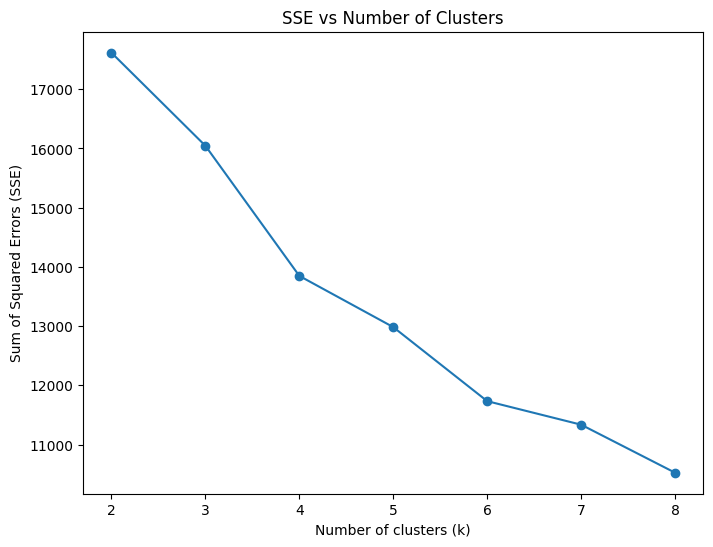

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

file_path = 'accounts.csv'  # Adjust the path to your file
data = pd.read_csv(file_path)

data_selected = data.iloc[:, :8]

data_cleaned = data_selected.drop_duplicates().dropna()

data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_encoded)

sse = []
k_value = range(2, 9)  # k values from 2 to 8

for k in k_value:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(data_normalized)
    sse.append(kmeans.inertia_)  # Store the SSE for each k

plt.figure(figsize=(8, 6))
plt.plot(k_value, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs Number of Clusters')
plt.show()

Using the sklearn library, I applied the k-means clustering algorithm to the normalized data with values of
𝑘
k ranging from {2, 3, 4, 5, 6, 7, 8}, setting max_iter=500 and random_state=42 to ensure reproducibility. The plot above shows the sum of squared errors (SSE) for each value of
𝑘
k.

This plot was generated using the "Elbow Method." The elbow method is a heuristic approach used to identify the optimal number of clusters. By plotting the SSE (which represents the sum of the squared distances between each data point and the centroid of its cluster) against the number of clusters, we can observe where the SSE starts to decrease at a slower rate. This point, where the slope of the curve begins to level off, is known as the "elbow." It represents the trade-off between the number of clusters and the model's accuracy, helping to identify an appropriate number of clusters to use.

b)

According to the plot above, the ideal number of clusters appears to be around 4, where the "elbow" is observed. At this point, adding more clusters does not significantly reduce the SSE, indicating that the model does not benefit substantially from additional clusters. Thus, choosing 4 clusters strikes a good balance between model complexity and the reduction of error. This suggests that there are likely 4 distinct customer segments within this dataset. Increasing the number of clusters beyond this point would add to the model’s complexity without providing a meaningful improvement in terms of segment differentiation.



c)

Using k-modes might be a better clustering approach for this dataset because it contains a significant number of categorical variables, such as job, marital, education, default, and more. K-means is designed primarily for numerical data, where it minimizes SSE based on Euclidean distance. This method does not handle categorical variables well because it relies on continuous distance measures that are not meaningful for nominal data. In contrast, the k-modes algorithm is specifically designed for categorical data. It minimizes the dissimilarity between clusters by using matching distance (counting the number of mismatches between categorical attributes), which is more appropriate for nominal data. Therefore, using k-modes would likely result in clusters that more accurately reflect the true structure of customer segments in this dataset, as it would consider the categorical nature of most features.

### **exercicio 2**

a)

The explained variance ratio, which was printed in the output, shows the proportion of the dataset's total variance captured by the first two components. This value represents how much of the information (or variability) in the original eight features is retained in the two-dimensional representation created by PCA.

If the combined explained variance of the first two components is high (typically above 70-80%), it indicates that most of the information from the original features is preserved in these two dimensions, which makes this reduced representation a good summary of the data. On the other hand, if the explained variance is lower, it may suggest that more components are needed to retain an adequate amount of the original data's information.

This explained variance metric is essential for assessing the effectiveness of PCA as a dimensionality reduction technique, as it helps determine how well we can represent the data with just two principal components.

b)

Explained variance by the first 2 components: 0.23


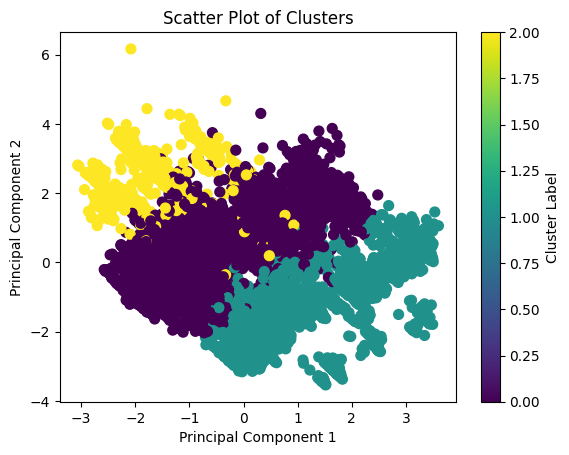

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('accounts.csv')

# Select the first 8 features and preprocess
data = data.iloc[:, :8]
data = data.drop_duplicates().dropna()
data_encoded = pd.get_dummies(data, drop_first=True)

# Normalize data using StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_encoded)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_standardized)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by the first 2 components: {explained_variance[0] + explained_variance[1]:.2f}")



# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_standardized)

# Scatter plot using the first two principal components
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Clusters')
plt.colorbar(label='Cluster Label')
plt.show()

The explained variance calculated by the code shows how much of the original data's variability is retained when projecting it onto the two-dimensional space defined by the first two components. A higher explained variance indicates that the 2D representation is a more accurate reflection of the original dataset. The printed value reveals how much of the data's total variance is captured by these components.

The scatter plot shows clusters in the space of the two principal components, where each point represents an observation, and each color indicates a cluster. If the points from different clusters are well separated in the plot, it suggests that the K-means algorithm effectively identified distinct groups within the data. In contrast, if there is significant overlap between clusters, it may indicate that the groups are less distinct and that the number of clusters might need to be adjusted.

Observing the shape and dispersion of each cluster can also reveal insights. For instance, clusters that appear more spread out indicate greater internal variability, while more compact clusters suggest more homogeneous groupings.

If the clusters are clearly separated, then selecting three clusters (with
𝑘
=
3
k=3) appears to be appropriate for this dataset, suggesting that the identified customer segments are meaningfully distinct. If the separation is less clear, it could be worth trying different values for
𝑘
k or exploring alternative clustering methods, such as k-modes, especially if the dataset includes many categorical variables, as suggested in the previous question.

This visual analysis helps evaluate whether the chosen number of clusters is suitable and provides an initial understanding of each customer segment's characteristics.

c)


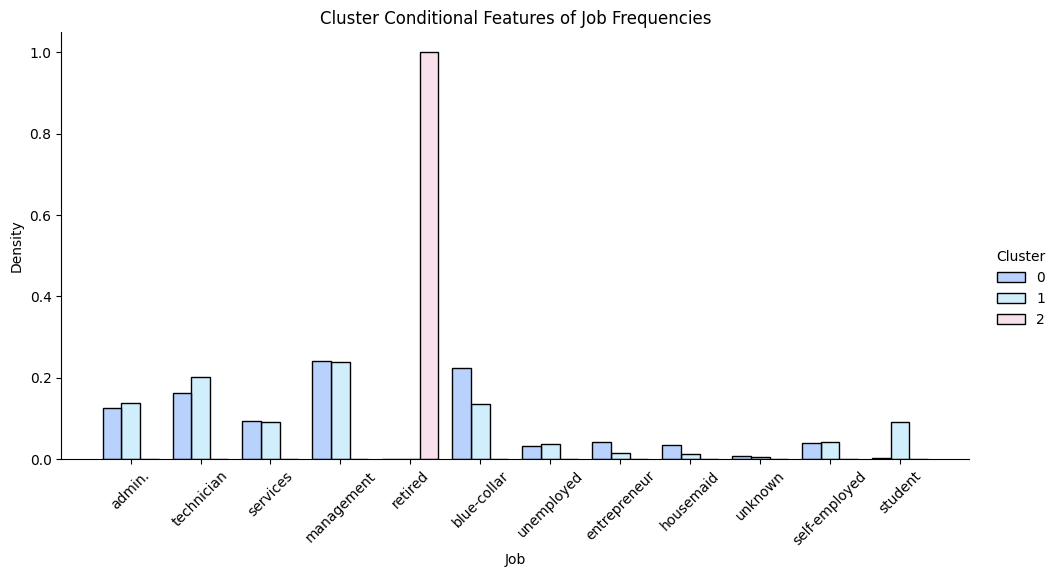

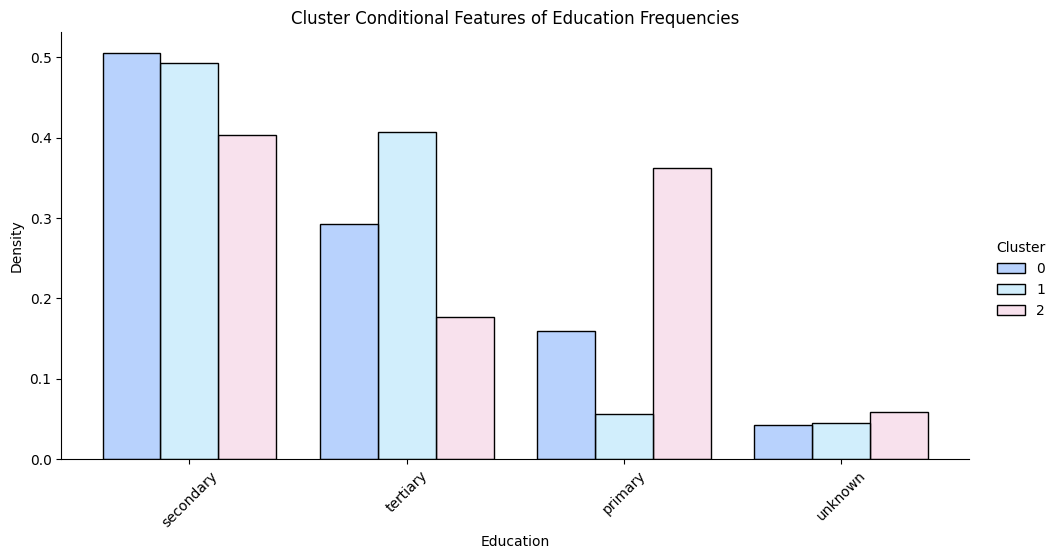

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data = pd.read_csv('accounts.csv')

data = data.iloc[:, :8].drop_duplicates().dropna()

data_categorical = data[['job', 'education']].copy()

data_encoded = pd.get_dummies(data, drop_first=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)  # Use scaled data for clustering

data_categorical['Cluster'] = clusters

palette = ["#A1C4FD", "#C2E9FB", "#F6D8E8"]

sns.displot(data=data_categorical, x='job', hue='Cluster', kind="hist", multiple="dodge",
            stat='density', shrink=0.8, common_norm=False, palette=palette, aspect=2.0)
plt.xticks(rotation=45)
plt.title("Cluster Conditional Features of Job Frequencies")
plt.xlabel("Job")
plt.ylabel("Density")
plt.show()

sns.displot(data=data_categorical, x='education', hue='Cluster', kind="hist", multiple="dodge",
            stat='density', shrink=0.8, common_norm=False, palette=palette, aspect=2.0)
plt.xticks(rotation=45)
plt.title("Cluster Conditional Features of Education Frequencies")
plt.xlabel("Education")
plt.ylabel("Density")
plt.show()


Beginning with the "Job" distribution across clusters, each bar indicates the relative density of various job categories within each cluster. For instance, if Cluster 0 exhibits a high concentration of roles such as "Engineer," it suggests that this group is composed of individuals with specialized skills or careers in technology. On the other hand, if Cluster 1 shows a significant number of lower-skilled positions, like "Attendant" or "Laborer," it may imply that this cluster includes customers with less formal education or those in entry-level jobs. Additionally, if Cluster 2 features a wider variety of professions or a noticeable presence of roles in creative or service sectors, this could reflect a more diverse occupational background among its members.

Now, turning to the "Education" distribution by clusters, a similar interpretation can be applied. The bars in this graph represent the density of different educational attainment levels for each cluster. For example, if Cluster 0 predominantly consists of individuals with higher education degrees, it may indicate a group of customers with greater socioeconomic status or better access to educational resources. In contrast, if a cluster contains a large proportion of individuals with only a high school education, it might represent a demographic facing more limited educational opportunities. If Cluster 2 displays a more balanced range of educational backgrounds, including vocational training, it could suggest that this segment values practical skills and training.

Overall, the variations in the "job" and "education" distributions across the clusters provide valuable insights into the demographic and professional profiles of the customers. Understanding these characteristics is vital for effectively segmenting the market and tailoring marketing strategies. The findings from these distributions can guide decisions on the types of products and services to offer each group, leading to more personalized and impactful marketing efforts.
